# **Machine Learning CNN Project**

## **Group Members**

1)	Chinni Vamshi Krushna- 2021A7PS2084H

2)	Atharva Chikhale- 2021A7PS2752H

3)	Rishabh Mittal- 2021A7PS2620H

# **Importing the dataset**

In [23]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img
import matplotlib.pyplot as plt
import string

In [24]:
test_df = pd.read_csv("sign_mnist_test.csv", delimiter=',')
train_df = pd.read_csv("sign_mnist_train1.csv", delimiter=',')


train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [25]:
X_train, y_train = np.array(train_df.iloc[:, 1:]).reshape(-1, 28, 28).astype('float64'), np.array(train_df.label).astype('float64')
X_test, y_test = np.array(test_df.iloc[:, 1:]).reshape(-1, 28, 28).astype('float64'), np.array(test_df.label).astype('float64')

print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(7172, 28, 28) (7172,)
(27455, 28, 28) (27455,)


In [26]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)

train_generator = train_datagen.flow(x=np.expand_dims(X_train, axis=-1), y=y_train,
                  batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow(x=np.expand_dims(X_test, axis=-1), y=y_test,
                  batch_size=32)

# **Seeing the Training Images**

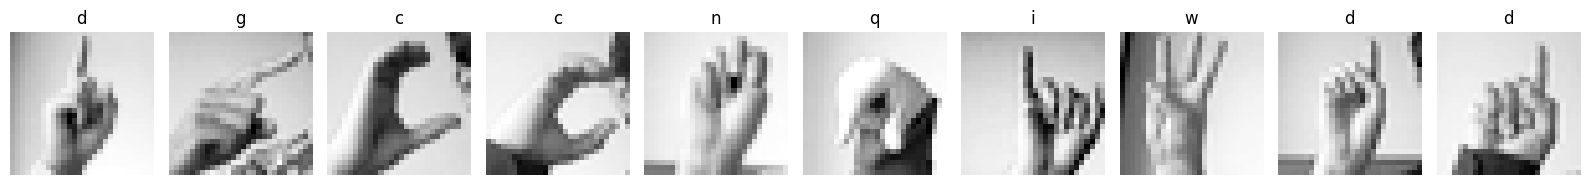

In [27]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(X_train, y_train)

# Defining the Model

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

tf.random.set_seed(1234)

model = tf.keras.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(26, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

# **Running the Model**

In [31]:
history = model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
858/858 [==============================] - 25s 29ms/step - loss: 0.3038 - accuracy: 0.8981 - val_loss: 0.1318 - val_accuracy: 0.9583
Epoch 2/10
858/858 [==============================] - 27s 31ms/step - loss: 0.2902 - accuracy: 0.9021 - val_loss: 0.0906 - val_accuracy: 0.9671
Epoch 3/10
858/858 [==============================] - 26s 31ms/step - loss: 0.2619 - accuracy: 0.9124 - val_loss: 0.0619 - val_accuracy: 0.9828
Epoch 4/10
858/858 [==============================] - 27s 31ms/step - loss: 0.2475 - accuracy: 0.9155 - val_loss: 0.0503 - val_accuracy: 0.9873
Epoch 5/10
858/858 [==============================] - 26s 31ms/step - loss: 0.2259 - accuracy: 0.9245 - val_loss: 0.0624 - val_accuracy: 0.9791
Epoch 6/10
858/858 [==============================] - 26s 31ms/step - loss: 0.2103 - accuracy: 0.9288 - val_loss: 0.0447 - val_accuracy: 0.9830
Epoch 7/10
858/858 [==============================] - 26s 30ms/step - loss: 0.2135 - accuracy: 0.9286 - val_loss: 0.1031 - val_accuracy:

# **Plotting the Graphs**

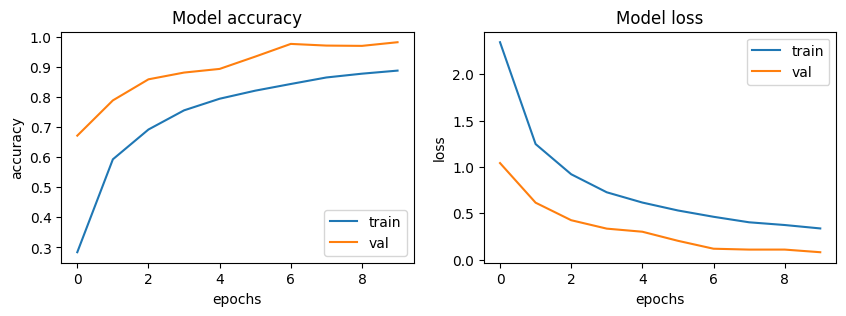

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# **Visualisation**


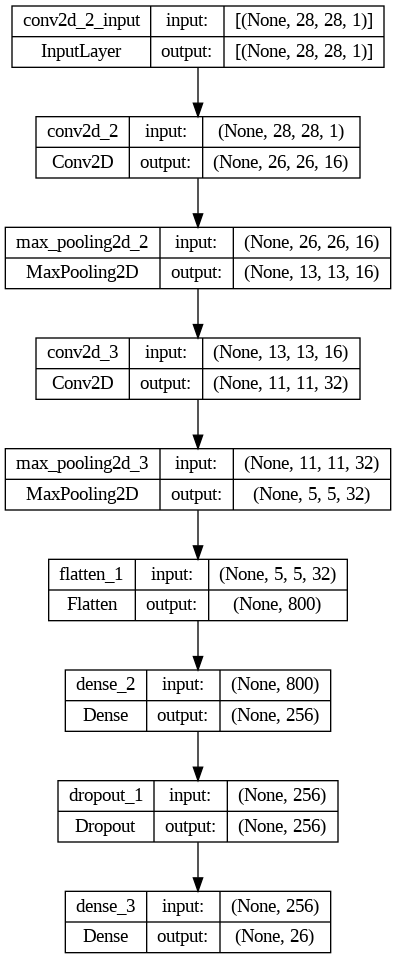

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)